## Digit recognizer

https://www.kaggle.com/c/digit-recognizer

An intro to machine learning

Tutorial followed: https://www.kaggle.com/archaeocharlie/a-beginner-s-approach-to-classification/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [2]:
labeled_images = pd.read_csv('train.csv')

In [ ]:
labeled_images.head()

In [3]:
images = labeled_images.iloc[0:28000,1:]
labels = labeled_images.iloc[0:28000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

/Users/lukas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0.5,1,'0')

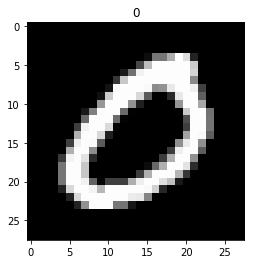

In [4]:
i=1
img=train_images.iloc[i].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([585.,  11.,  14.,   7.,  15.,  13.,   9.,   9.,  12., 109.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

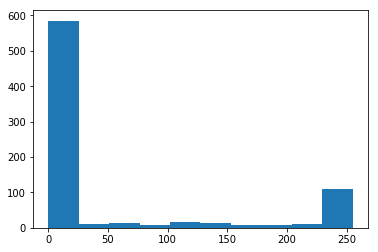

In [5]:
plt.hist(train_images.iloc[i])

In [ ]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

/Users/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lukas/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://

Text(0.5,1,'label    0\nName: 8850, dtype: int64')

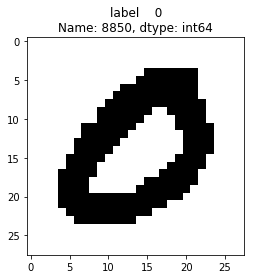

In [6]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([573.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 211.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

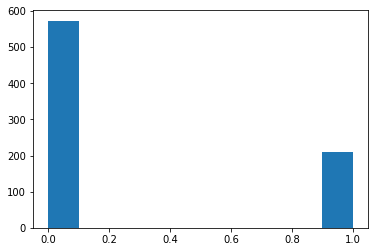

In [7]:
plt.hist(train_images.iloc[i])

In [8]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.9326785714285715

In [9]:
test_data=pd.read_csv('test.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:28000])

In [10]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [11]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv', header=True)